In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scienceplots
plt.style.use(['nature', 'no-latex'])

1. Number of Articles
> Re.csv is a rearranged copy of PKG23_A06_MeshHeadingList.csv

1.1 Pubmed # Articles

In [15]:
from tqdm import tqdm
prev = 0
pmid_set = set()
cnt = 0
with open("../Dataset/Re.csv", encoding="UTF-8") as f:
    title = f.readline()
    for line in tqdm(f, desc="Number of Articles"):
        pmid = line.split(',')[0].strip('"').strip("'")
        if pmid != prev:
            pmid_set.add(pmid)
            cnt +=1
        prev = pmid
print(cnt)
print(pmid)

Number of Articles: 314390853it [03:42, 1416117.35it/s]

30010608
36472379


In [21]:
len(pmid_set)

30010608

In [13]:
df_pmid = pd.read_csv("../Dataset/PKG23_A06_MeshHeadingList.csv", usecols=['PMID'])
df_pmid

,PMID
0,1
1,1
2,1
3,1
4,1
...,...
314390848,36472375
314390849,36472375
314390850,36472379
314390851,36472379


In [14]:
df_pmid["PMID"].nunique()

30010608

In [20]:
pmid_set2 = set(map(str, df_pmid["PMID"].unique()))
diff = pmid_set2.difference(pmid_set)
diff

set()

1.2 Commented  # Articles

In [7]:
df_pmid_commented = pd.read_csv("../Dataset/2_PubMed_comted_pmid_220916.csv")
df_pmid_commented

,PMID_art
0,30543192
1,24051115
2,33521713
3,26417971
4,24329643
...,...
850263,9506363
850264,15167435
850265,8044937
850266,28228602


In [8]:
df_pmid_commented['PMID_art'].nunique()

850268

In [9]:
commented_pmid_set = set(df_pmid_commented['PMID_art'].unique())

2. Number of Descriptor MeSH headings

2.1 Pubmed

In [3]:
df = pd.read_csv("../Dataset/PKG23_A06_MeshHeadingList.csv")
df

,PMID,DescriptorName,DescriptorName_MajorTopicYN,DescriptorName_Type,DescriptorName_UI,QualifierName
0,1,Aldehyde Oxidoreductases,N,NaN,D000445,N:Q000378:metabolism
1,1,Animals,N,NaN,D000818,NaN
2,1,Body Fluids,N,NaN,D001826,Y:Q000032:analysis
3,1,Carbon Dioxide,N,NaN,D002245,N:Q000097:blood
4,1,Formates,N,NaN,D005561,N:Q000097:blood;Y:Q000506:poisoning
...,...,...,...,...,...,...
314390848,36472375,United States,N,Geographic,D014481,NaN
314390849,36472375,Awards and Prizes,Y,NaN,D001363,NaN
314390850,36472379,Humans,N,NaN,D006801,NaN
314390851,36472379,End Stage Liver Disease,Y,NaN,D058625,NaN


In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [27]:
grouped = df.groupby("PMID")['DescriptorName_UI'].agg(len)
grouped.describe()

count   30010608.000
mean          10.476
std            5.023
min            1.000
25%            7.000
50%           10.000
75%           14.000
max           68.000
Name: DescriptorName_UI, dtype: float64

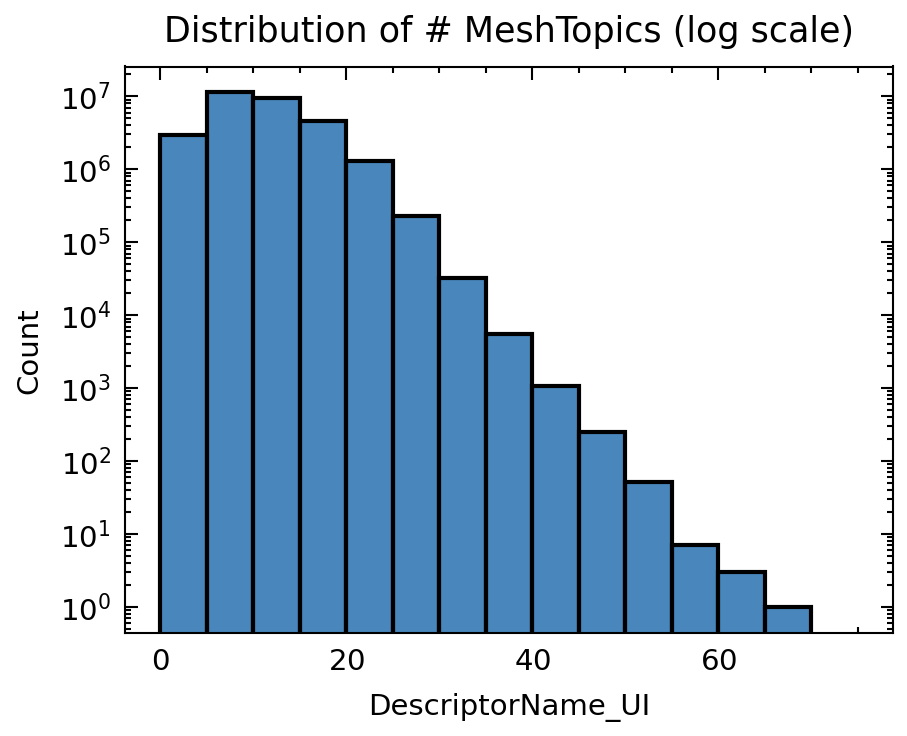

In [18]:
plt.figure(dpi=300)
sns.histplot(grouped, log_scale=(False, True), label='all', bins=range(0, 76, 5))
plt.title(r"Distribution of # MeshTopics")
plt.show()

2.2 Commented

In [10]:
df_commented = df.loc[df['PMID'].isin(commented_pmid_set)]
df_commented

,PMID,DescriptorName,DescriptorName_MajorTopicYN,DescriptorName_Type,DescriptorName_UI,QualifierName
1248,95,Fibrinogen,Y,NaN,D005340,NaN
1249,95,Hydrogen-Ion Concentration,N,NaN,D006863,NaN
1250,95,Molecular Conformation,N,NaN,D008968,NaN
1251,95,"Spectrometry, Fluorescence",N,NaN,D013050,NaN
1252,95,Temperature,N,NaN,D013696,NaN
...,...,...,...,...,...,...
313343835,36112522,Magnetic Resonance Imaging,Y,NaN,D008279,N:Q000379:methods
313343836,36112522,Artifacts,Y,NaN,D016477,NaN
313343837,36112522,Contrast Media,N,NaN,D003287,NaN
313343838,36112522,Diffusion Magnetic Resonance Imaging,N,NaN,D038524,NaN


In [24]:
df_commented['PMID'].nunique()

829791

In [28]:
grouped_cmt = df_commented.groupby("PMID")['DescriptorName_UI'].agg(len)
grouped_cmt.describe()

count   829791.000
mean        12.058
std          5.555
min          1.000
25%          8.000
50%         12.000
75%         16.000
max         51.000
Name: DescriptorName_UI, dtype: float64

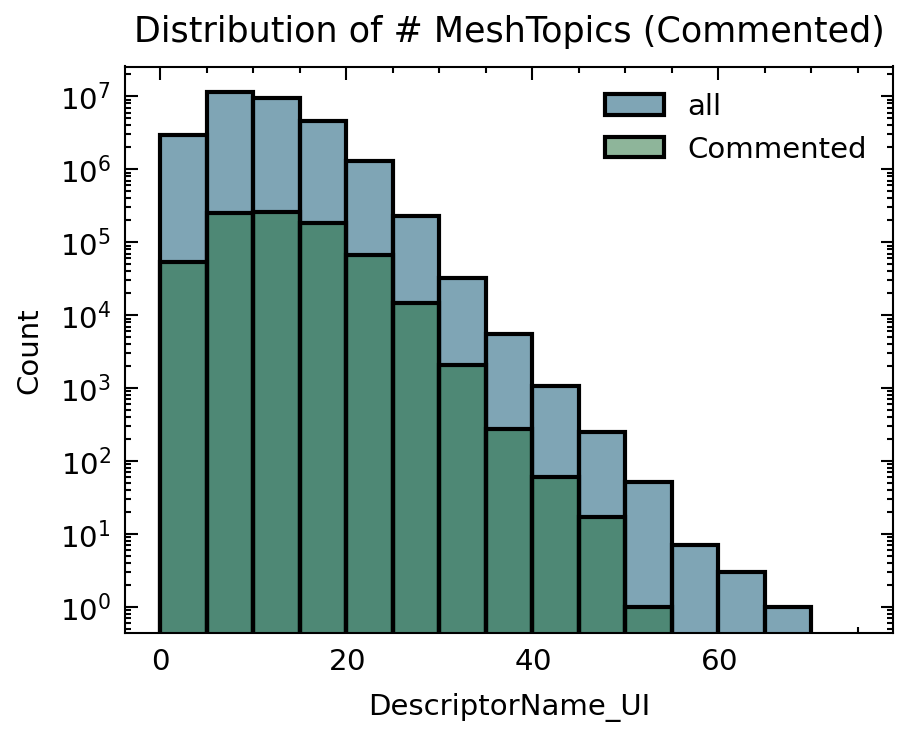

In [32]:
plt.figure(dpi=300)
sns.histplot(grouped, log_scale=(False, True), label='all', bins=range(0, 76, 5), color='#004c6d', alpha=0.5)
sns.histplot(grouped_cmt, log_scale=(False, True), label='Commented', bins=range(0, 76, 5), color='#1e6d37', alpha=0.5)
plt.title(r"Distribution of # MeshTopics (Commented)")
plt.legend()
plt.show()

3. Number of Major DescriptorMeSH headings

3.1 Proportion

In [ ]:
df_major = df[df['DescriptorName_MajorTopicYN']=='Y']
df_commented_major = df_commented[df_commented['DescriptorName_MajorTopicYN']=='Y']

In [38]:
# Pubmed
major = df_major["PMID"].nunique()
total = df["PMID"].nunique(())
print(f"{major} / {total} = {major / total}")

17106579 / 30010608 = 0.5700177417265255


In [39]:
# Commented
major = df_commented_major['PMID'].nunique()
total = df_commented["PMID"].nunique()
print(f"{major} / {total} = {major / total}")

486147 / 829791 = 0.5858668026045113


3.2  Distribution

In [40]:
# Pubmed major topic
grouped = df_major.groupby("PMID")['DescriptorName_UI'].agg(len)
grouped.describe()

count   17106579.000
mean           2.012
std            1.428
min            1.000
25%            1.000
50%            2.000
75%            2.000
max           44.000
Name: DescriptorName_UI, dtype: float64

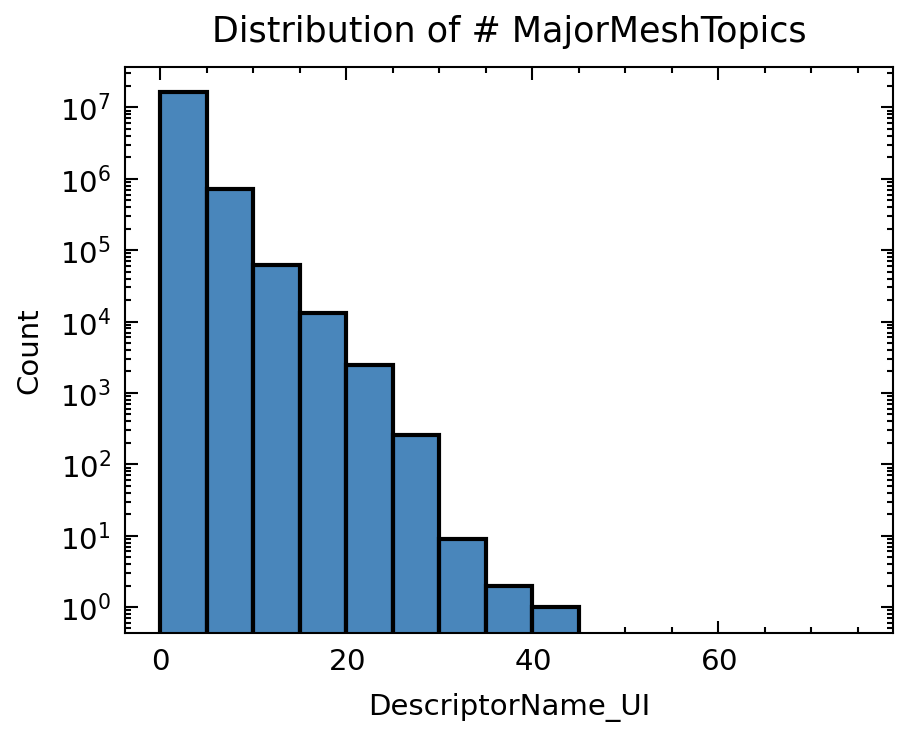

In [41]:
plt.figure(dpi=300)
sns.histplot(grouped, log_scale=(False, True), label='all', bins=range(0, 76, 5))
plt.title(r"Distribution of # MajorMeshTopics")
plt.show()

In [42]:
# Commented major topic
grouped_cmt = df_commented_major.groupby("PMID")['DescriptorName_UI'].agg(len)
grouped_cmt.describe()

count   486147.000
mean         1.836
std          1.017
min          1.000
25%          1.000
50%          2.000
75%          2.000
max         19.000
Name: DescriptorName_UI, dtype: float64

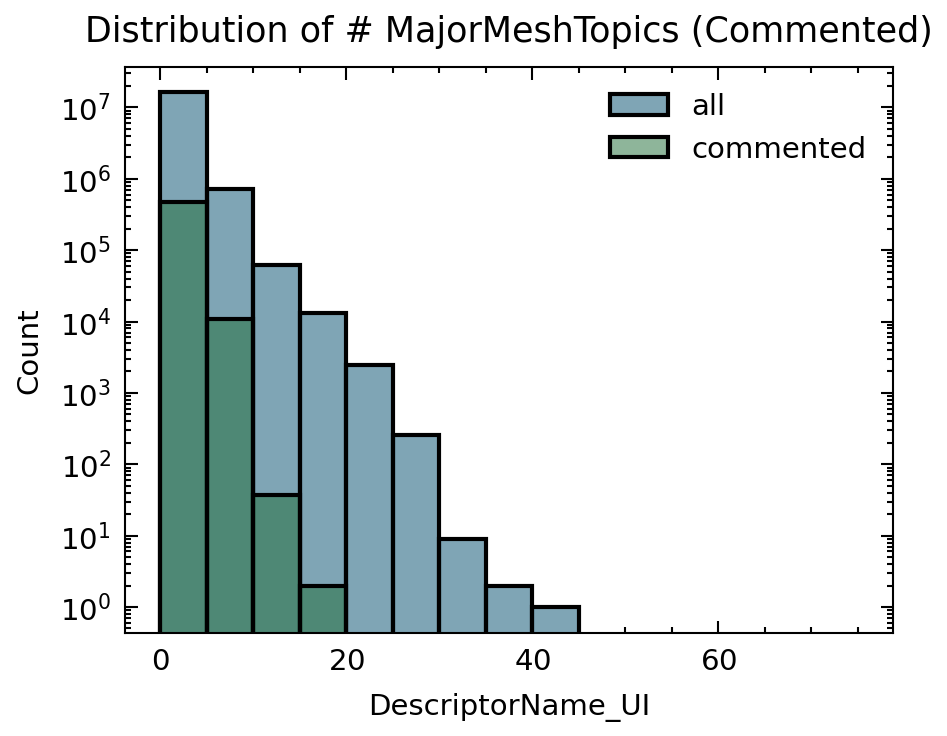

In [45]:
plt.figure(dpi=300)
sns.histplot(grouped, log_scale=(False, True), label='all', bins=range(0, 76, 5), color='#004c6d', alpha=0.5)
sns.histplot(grouped_cmt, log_scale=(False, True), label='commented', bins=range(0, 76, 5), color='#1e6d37', alpha=0.5)
plt.title(r"Distribution of # MajorMeshTopics (Commented)")
plt.legend()
plt.show()

4. Number of Qualifiers

4.1 Multi Qualifier

In [11]:
df_qualifers = df[df["QualifierName"].notnull()][["PMID", "QualifierName"]]
df_commented_qualifers = df_commented[df_commented["QualifierName"].notnull()][["PMID", "QualifierName"]]

In [12]:
# multi value in one row
df_qualifers

,PMID,QualifierName
0,1,N:Q000378:metabolism
2,1,Y:Q000032:analysis
3,1,N:Q000097:blood
4,1,N:Q000097:blood;Y:Q000506:poisoning
9,1,N:Q000097:blood
...,...,...
314390834,36472364,N:Q000235:genetics
314390840,36472365,N:Q000175:diagnosis
314390843,36472366,N:Q000175:diagnosis
314390845,36472366,N:Q000175:diagnosis


In [13]:
# how frequently does this happen
def count_qualifiers(x):
    return x.count(';') + 1

df_qualifers["Num"] = df_qualifers['QualifierName'].apply(lambda x: count_qualifiers(x))
df_qualifers

,PMID,QualifierName,Num
0,1,N:Q000378:metabolism,1
2,1,Y:Q000032:analysis,1
3,1,N:Q000097:blood,1
4,1,N:Q000097:blood;Y:Q000506:poisoning,2
9,1,N:Q000097:blood,1
...,...,...,...
314390834,36472364,N:Q000235:genetics,1
314390840,36472365,N:Q000175:diagnosis,1
314390843,36472366,N:Q000175:diagnosis,1
314390845,36472366,N:Q000175:diagnosis,1


In [14]:
df_qualifers["Num"].describe()

count   120072914.000
mean            1.404
std             0.677
min             1.000
25%             1.000
50%             1.000
75%             2.000
max            14.000
Name: Num, dtype: float64

In [15]:
df_commented_qualifers["Num"] = df_commented_qualifers['QualifierName'].apply(lambda x: count_qualifiers(x))
df_commented_qualifers["Num"].describe()

count   3547253.000
mean          1.483
std           0.732
min           1.000
25%           1.000
50%           1.000
75%           2.000
max          10.000
Name: Num, dtype: float64

4.2 Proportion

In [16]:
# Pubmed
major = df_qualifers["PMID"].nunique()
total = df["PMID"].nunique(())
print(f"{major} / {total} = {major / total}")

26550070 / 30010608 = 0.8846895071236144


In [17]:
# Commented
major = df_commented_qualifers["PMID"].nunique()
total = df_commented["PMID"].nunique(())
print(f"{major} / {total} = {major / total}")

760805 / 829791 = 0.9168634029532737


4.3 Distribution

In [18]:
df_qualifier = df_qualifers[["PMID","QualifierName"]]
df_qualifier["QualifierName"] = df_qualifier["QualifierName"].str.split(";")
df_qualifier = df_qualifier.explode("QualifierName")
df_qualifier[['isMajorTopic', 'QualifierID', "QualifierName"]] = df_qualifier['QualifierName'].str.split(':', expand=True)
df_qualifier


<ipython-input-18-f2010f98f87f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualifier["QualifierName"] = df_qualifier["QualifierName"].str.split(";")


,PMID,QualifierName,isMajorTopic,QualifierID
0,1,metabolism,N,Q000378
2,1,analysis,Y,Q000032
3,1,blood,N,Q000097
4,1,blood,N,Q000097
4,1,poisoning,Y,Q000506
...,...,...,...,...
314390834,36472364,genetics,N,Q000235
314390840,36472365,diagnosis,N,Q000175
314390843,36472366,diagnosis,N,Q000175
314390845,36472366,diagnosis,N,Q000175


In [19]:
df_qualifier_commented = df_qualifier.loc[df_qualifier["PMID"].isin(commented_pmid_set)]
df_qualifier_commented

,PMID,QualifierName,isMajorTopic,QualifierID
5567,477,metabolism,N,Q000378
5568,477,metabolism,N,Q000378
5569,477,metabolism,N,Q000378
5570,477,metabolism,N,Q000378
5571,477,metabolism,N,Q000378
...,...,...,...,...
313314567,36104064,epidemiology,N,Q000453
313314567,36104064,psychology,N,Q000523
313314572,36104064,psychology,N,Q000523
313343835,36112522,methods,N,Q000379


In [21]:
# Pubmed
grouped = df_qualifier.groupby("PMID")['QualifierID'].agg(len)
print(grouped.describe())

count   26550070.000
mean           6.351
std            4.662
min            1.000
25%            3.000
50%            5.000
75%            9.000
max           73.000
Name: QualifierID, dtype: float64


In [22]:
# Commented
grouped = df_qualifier_commented.groupby("PMID")['QualifierID'].agg(len)
print(grouped.describe())

count   760805.000
mean         6.913
std          4.884
min          1.000
25%          3.000
50%          6.000
75%          9.000
max         58.000
Name: QualifierID, dtype: float64


4.4 self-loop

In [23]:
# TODO: deal with self loop

5. Number of Major Qualifiers

5.1 Proportion

In [25]:
df_qualifier = df_qualifier[df_qualifier["isMajorTopic"] == "Y"]
df_qualifier_commented = df_qualifier_commented[df_qualifier_commented["isMajorTopic"] == "Y"]

In [26]:
# Pubmed
major = df_qualifier["PMID"].nunique()
total = df["PMID"].nunique(())
print(f"{major} / {total} = {major / total}")

24349243 / 30010608 = 0.8113545383685662


In [27]:
# Commented
major = df_qualifier_commented["PMID"].nunique()
total = df_commented["PMID"].nunique(())
print(f"{major} / {total} = {major / total}")

700518 / 829791 = 0.8442101685846195


5.2 Distribution

In [28]:
# Pubmed
grouped = df_qualifier.groupby("PMID")['QualifierID'].agg(len)
print(grouped.describe())

# Commented
grouped = df_qualifier_commented.groupby("PMID")['QualifierID'].agg(len)
print(grouped.describe())

count   24349243.000
mean           2.985
std            1.622
min            1.000
25%            2.000
50%            3.000
75%            4.000
max           35.000
Name: QualifierID, dtype: float64
count   700518.000
mean         3.196
std          1.654
min          1.000
25%          2.000
50%          3.000
75%          4.000
max         28.000
Name: QualifierID, dtype: float64
